In [110]:
#@title Installing needed dependencies!
from IPython.display import clear_output
try:
    import networkx as nx
    import matplotlib.pyplot as plt
    import matplotlib as mplt
    import pandas as pd
    import numpy as np
    import os
    import sys
    import string
    import re
    import nltk
    from nltk import ngrams
    from unidecode import unidecode
    #from nltk.corpus import stopwords

    print("Modules required are already installed!")
except ModuleNotFoundError:
    %pip install networkx
    clear_output()
    %pip install matplotlib
    clear_output()
    %pip install pandas
    clear_output()
    %pip install nltk
    clear_output()
    %pip install unidecode
    clear_output()

    print("All modules required were sucessfully installed!")

Modules required are already installed!


['sololearn', 'smilingfacewithhearteyes', 'duolingo', 'grinningfacewithbigeyes', 'kotlin', 'smilingfacewithsunglasses', 'beamingfacewithsmilingeyes', 'play store', 'phyton', 'code playground', 'buenardo', 'smilingfacewithsmilingeyes', 'visual basic', 'solo learn', 'google play', 'facewithtearsofjoy', 'sololearn pro', 'u', 'play', 'nasa', 'cuba', 'grinningfacewithsmilingeyes', 'loudlycryingface', 'python 3', 'redheart', 'java script', 'python', 'ruby', 'argentina', 'uds', 'hello world', 'udemy', 'visual studio code', 'script', 'learn', 'colombia', 'android studio', 'facewithsteamfromnose', 'java', 'callmehandlightskintone', 'adderly cespedes', 'swift', 'pensiveface', 'php', 'pascal', 'clappinghands', 'sql', 'facesavoringfood', 'platzi', 'slightlysmilingface', 'star  star  star  star  star', 'heartsuit', 'googlec', 'facescreaminginfear', 'google development', 'free fire', 'freecodecamp', 'raisinghandsmediumskintone', 'game maker language', 'python core', 'gmail', 'chevere', 'chévere', 'l

<ipython-input-116-f06ba2679418>:256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


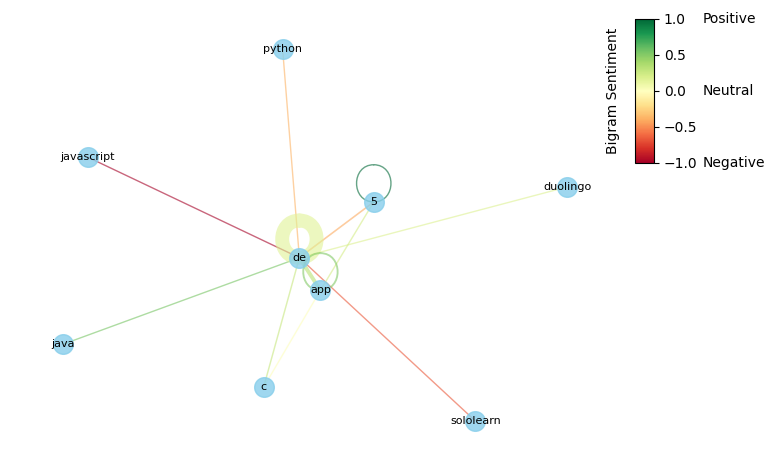

In [116]:
from nltk.tag.brill import Word
#@title Plot Top K Most Frequent Bigrams in Reviews by App

#@markdown **Data**

#@markdown * ### Pick language:
language = "Spanish" #@param ["English", "Spanish"]

#@markdown * ### Pick store (There are only Google Play Store reviews for Spanish):
store = "Google Play Store" #@param ["App Store", "Google Play Store", "Combined"]

#@markdown * ### Pick app:
app = "sololearn" #@param ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "python-x", "sololearn"]


#@markdown * ### Only NER tags?
only_ner = "Yes" #@param ["Yes", "No"]

#@markdown * ### How many bigrams?
bigram_count = 20 #@param {type:"number"}

#@markdown * ### Add any words to exclude as a comma separated list
exclude_words = "" #@param {type:"string"}
exclude_list = [word.strip() for word in exclude_words.split(',')]


#@markdown **Graph Appearance**

#@markdown * ### Scale edge widths with bigram frequency?
edge_width_change = 'Yes' #@param ["Yes", "No"]

#@markdown * ### Scale edge colors with bigram sentiment?
edge_color_change = 'Yes' #@param ["Yes", "No"]

#@markdown * ### Layout:
graph_layout = 'Fruchterman-Reingold' #@param ["Fruchterman-Reingold", "Spring"]

#@markdown * ### Optimal distance between nodes (if nodes are too clumped up, try increasing this):
node_distance = 1 #@param {type:"number"}


dir = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/"
#dir = "./"

if language == 'English':

  # Reviews from different stores are named differently and in different folders
  if store == "App Store":
    dir += "applestore-review-files-standardized/"
    reviewfile = "applestore-review-" + app + "_sentiment_standardized.csv"
  elif store == 'Google Play Store':
    dir += "googleplay-review-files-standardized/"
    reviewfile = "googleplay-review-" + app + "_sentiment_standardized.csv"
  elif store == 'Combined':
    dir += "combined-review-files-standardized/"
    reviewfile = "combined-review-" + app + "_sentiment_standardized.csv"

elif language == 'Spanish':

  #   # Reviews from different stores are named differently and in different folders
  # if store == "App Store":
  #   dir += "applestore-review-files-standardized_Spanish/"
  #   reviewfile = "applestore-review-" + app + "_Spanish_sentiment_standardized.csv"
  # else:
  dir += "googleplay-review-files-standardized_Spanish/"
  reviewfile = "googleplay-review-" + app + "_Spanish_sentiment_standardized.csv"

df = pd.read_csv(dir + reviewfile)
#df = pd.read_csv('/applestore-review-codeacademy_sentiment_standardized.csv')

if language == 'English':
  dir_ner = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/NER-count/NER-count-files/"
  if store == 'App Store':
    reviewfile_ner = "applestore-review-" + app + "_NER_count.csv"
  elif store == 'Google Play Store':
    reviewfile_ner = "googleplay-review-" + app + "_NER_count.csv"

elif language == 'Spanish':
  dir_ner = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/NER-count/NER-count-files-Spanish/"
  reviewfile_ner = app + "_Spanish_NER_count.csv"

df_ner = pd.read_csv(dir_ner + reviewfile_ner)


ner_list = df_ner['NER_Text'].tolist()
print(ner_list)
# ner_set = set(ner_list)
# ner_list = [''.join(preprocess(word)) for word in ner_list]

def preprocess(text):
    # Tokenization
    text = text.split()

    # Remove leading/trailing whitespace
    text = [word.strip() for word in text]

    # Convert to lowercase
    text = [word.lower() for word in text]

    # Remove punctuation
    text = [re.sub(r'[^\w\s]', '', word) for word in text]
    #text = re.sub(r'[^\w\s]', '', word)
    
    # Remove diacritics and accents
    text = [unidecode(word) for word in text]

    
    # Remove stopwords
    #stop_words = set(stopwords.words("english"))
    #text = [word for word in text if word not in stop_words]

    # Return the standardized string
    #return ' '.join(text)

    return text
    

def ner_filter(text):
    # Create a regular expression pattern to match the substrings in order of appearance
    pattern = r"\b(?:{})\b".format("|".join(map(re.escape, ner_list)))

    # Find all matching substrings in the target string while preserving order
    matching_parts = re.findall(pattern, text)

    # Combine the matching parts into a single string
    result = " ".join(matching_parts)
    #print("{}" + text + " ][ " + result + "{}\n\n")
    return result

# Removing stopwords and tokenizing
df = df.rename(columns={"content": "review", "score": "rating", "at": "date"})
df['review'] = df['review'].astype('str')
df['standardizedReview'] = df['standardizedReview'].astype('str')

if only_ner == 'No':
  df['standardizedReview'] = df['standardizedReview'].apply(preprocess) 
elif only_ner == 'Yes':
  df['review_ner'] = df['review'].apply(ner_filter)
  df['standardizedReview'] = df['review_ner'].apply(preprocess) 

if language == 'English':
  # Assigning numerical value to sentiment
  df['sentimentScore'] = df['sentiment'].map({'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}) 
elif language == 'Spanish':
  df['sentimentScore'] = df['sentiment'].map({'POS': 1, 'NEU': 0, 'NEG': -1}) 


# Generate bigrams for each review
df['bigrams'] = df['standardizedReview'].apply(lambda x: list(ngrams(x, 2)))
bigram_frequency = df['bigrams'].explode().value_counts().to_dict()

# Exclude the words provided
bigram_frequency = {bigram: frequency for bigram, frequency in bigram_frequency.items()
                    if all(word not in bigram for word in exclude_list)}

#print(df_ner['NER_Text'])

# ner_list = df_ner['NER_Text'].tolist()
# ner_list = [''.join(preprocess(word)) for word in ner_list]
# print(ner_list)

# ner_set = set(ner_list)
# print(ner_set)

# # Select the bigrams that match the NER tags
# bigram_frequency = {bigram: frequency for bigram, frequency in bigram_frequency.items()
#                     if all(word in bigram for word in ner_list)}

# print(bigram_frequency)

# Get the top k bigrams
sorted_bigrams = sorted(bigram_frequency.items(), key=lambda x: x[1], reverse=True)
filtered_bigrams = dict(sorted_bigrams[:bigram_count])

bigram_sentiment = df.explode('bigrams').groupby('bigrams')['sentimentScore'].mean().to_dict()



# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
# for unigram in df['standardizedReview'].explode().unique():
#     G.add_node(unigram)

# for bigram in filtered_bigrams:
#     G.add_node(bigram)

# Add edges with size and color attributes
for bigram, frequency in filtered_bigrams.items():
    sentiment = bigram_sentiment.get(bigram, 0.0)
    G.add_edge(bigram[0], bigram[1], weight=frequency, sentiment=sentiment)

# Set edge sizes based on frequency and edge colors based on sentiment
edge_sizes = [data['weight'] for _, _, data in G.edges(data=True)]
# min_size = min(edge_sizes)
# edge_sizes = [size - min_size for size in edge_sizes]
# edge_sizes = [size/10 for size in edge_sizes]
edge_colors = [data['sentiment'] for _, _, data in G.edges(data=True)]

# Normalize edge sizes for more regular edge widths when plotting
min_val = np.min(edge_sizes)
max_val = np.max(edge_sizes)

# Define the target range
target_min = 1
target_max = 10

# Perform min-max scaling on each list
edge_sizes = [(target_max - target_min) * (lst - min_val) / (max_val - min_val) + target_min for lst in edge_sizes]

# Position nodes using a layout algorithm (e.g., spring layout)
if graph_layout == 'Fruchterman-Reingold':
  pos = nx.spring_layout(G, k=node_distance)
elif graph_layout == 'Spring':
  pos = nx.fruchterman_reingold_layout(G, k=node_distance)

# Draw nodes, edges, labels, and adjust visual parameters
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.8)

if edge_color_change == 'Yes':

  if edge_width_change == 'Yes':
    nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)
  else:
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)

else:

  if edge_width_change == 'Yes':
    nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color='grey', edge_cmap=plt.cm.RdYlGn, alpha=0.6)
  else:
    nx.draw_networkx_edges(G, pos, edge_color='grey', edge_cmap=plt.cm.RdYlGn, alpha=0.6)

nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')

if edge_color_change == 'Yes':

  # Create colorbar legend
  sm = plt.cm.ScalarMappable(cmap=mplt.colormaps['RdYlGn'], norm=plt.Normalize(vmin=-1, vmax=1))
  sm.set_array([])
  cbar_ax = plt.gcf().add_axes([1, 0.65, 0.03, 0.3])  # Adjust the position and size of the colorbar axes
  cbar = plt.colorbar(sm, cax=cbar_ax, shrink=0.5)  # Assign the colorbar axes

  # Rotate the colorbar label
  cbar.ax.yaxis.set_label_coords(-1.5, 3)
  cbar.ax.set_ylabel('Bigram Sentiment')

  # Add labels next to colorbar
  plt.text(3.5, 1, 'Positive', ha='left', va='center')
  plt.text(3.5, 0, 'Neutral', ha='left', va='center')
  plt.text(3.5, -1, 'Negative', ha='left', va='center')

# Display the visualization
plt.tight_layout()
plt.show()


https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-codeacademy_sentiment_standardized.csv
https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-datacamp_sentiment_standardized.csv
https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-encode_sentiment_standardized.csv
https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-learn-python-programiz_sentiment_standardized.csv
https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-mimo_sentiment_standardized.csv


<ipython-input-118-df700397f1c1>:73: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  appdf = pd.read_csv(dir + reviewfile)


https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-programming-hero_sentiment_standardized.csv
https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-programming-hub_sentiment_standardized.csv


<ipython-input-118-df700397f1c1>:73: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  appdf = pd.read_csv(dir + reviewfile)


https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/combined-review-files-standardized/combined-review-sololearn_sentiment_standardized.csv


<ipython-input-118-df700397f1c1>:73: DtypeWarning: Columns (6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  appdf = pd.read_csv(dir + reviewfile)


['Codecademy', 'Google', 'Nice', 'Python', 'Ca', 'Android', 'Facebook', 'Java', 'GitHub', 'Golang', 'Codeacademy', 'google', 'Go', 'Github', 'Codecademy Go', 'LinkedIn', 'C', 'God', 'Gmail', 'JavaScript', 'CodeAcademy', 'Ruby', 'CA', 'YouTube', 'codeacademy', 'Sololearn', 'Gud', 'Noice', 'SoloLearn', 'KhanAcademy', 'Scrimba', 'English', 'Pixel 2', 'FaceBook', 'PC', 'codecademy', 'Android 10', 'Android 9', 'Jesus', 'Web', 'Codeacademy Go', 'N.JS', 'Code academy', 'Code Academy Pro', 'Code Academy', 'github', 'HTML', 'JS', 'Pro', 'Ui', 'R', 'React JS', 'Stahp', 'USA', 'Tab S8 Ultra', 'React.JS', 'Streak', 'Samsung Galaxy S7', 'Samsung s9', 'Samsung galaxy j5 prime', 'University', 'Samsung S8', 'Realme', 'Samsung Note 9', 'Samsung Note 10', 'SQL', 'Samsung Galaxy Note 10', 'Unity', '.', 'V.V Good', 'kim', 'galaxy edge S7', 'galaxy tab S5e', 'honor play', 'iOS', 'iPad Pro', 'iPhone 6s', 'pro', 'Vout 2D', 'redmi note 5 pro', 's7', 'samsung s10', 'sshanumobile', 'xiaomi redmi 4 prime', 'העבר

<ipython-input-118-df700397f1c1>:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


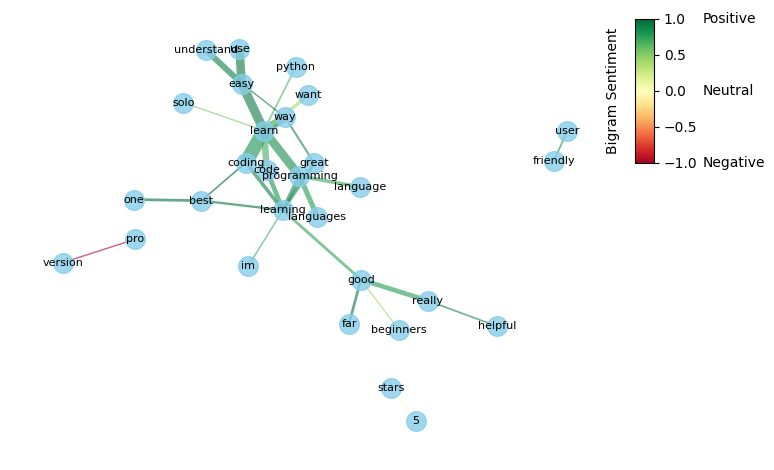

In [118]:
from nltk.tag.brill import Word
#@title Plot Top K Most Frequent Bigrams in All Reviews

#@markdown **Data**

#@markdown * ### Pick language:
language = "English" #@param ["English", "Spanish"]

#@markdown * ### Pick store (There are only Google Play Store reviews for Spanish):
store = "Combined" #@param ["App Store", "Google Play Store", "Combined"]

#@markdown * ### Only NER tags?
only_ner = "No" #@param ["Yes", "No"]

#@markdown * ### How many bigrams?
bigram_count = 30 #@param {type:"number"}

#@markdown * ### Add any words to exclude as a comma separated list
exclude_words = "app" #@param {type:"string"}
exclude_list = [word.strip() for word in exclude_words.split(',')]


#@markdown **Graph Appearance**

#@markdown * ### Scale edge widths with bigram frequency?
edge_width_change = 'Yes' #@param ["Yes", "No"]

#@markdown * ### Scale edge colors with bigram sentiment?
edge_color_change = 'Yes' #@param ["Yes", "No"]

#@markdown * ### Layout:
graph_layout = 'Fruchterman-Reingold' #@param ["Fruchterman-Reingold", "Spring"]

#@markdown * ### Optimal distance between nodes (if nodes are too clumped up, try increasing this):
node_distance = 4 #@param {type:"number"}


dir = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/bigram-network/"
#dir = "./"

# Combining reviews of all the apps
df = pd.DataFrame(columns = ['review', 'rating', 'title', 'sentiment', 'standardizedReview'])

if language == 'English':

  # Reviews from different stores are named differently and in different folders
  if store == "App Store":

    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "python-x", "sololearn"]
    dir += "applestore-review-files-standardized/"
    
    for app in apps:
      reviewfile = "applestore-review-" + app + "_sentiment_standardized.csv"
      appdf = pd.read_csv(dir + reviewfile)
      df = pd.concat([df, appdf], ignore_index=True)

  elif store == 'Google Play Store':
    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
    dir += "googleplay-review-files-standardized/"

    for app in apps:
      reviewfile = "googleplay-review-" + app + "_sentiment_standardized.csv"
      appdf = pd.read_csv(dir + reviewfile)
      df = pd.concat([df, appdf], ignore_index=True)
    
  elif store == 'Combined':
    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
    dir += "combined-review-files-standardized/"

    for app in apps:
      reviewfile = "combined-review-" + app + "_sentiment_standardized.csv"
      print(dir + reviewfile)
      appdf = pd.read_csv(dir + reviewfile)
      df = pd.concat([df, appdf], ignore_index=True)

elif language == 'Spanish':

  #   # Reviews from different stores are named differently and in different folders
  # if store == "App Store":
  #   dir += "applestore-review-files-standardized_Spanish/"
  #   reviewfile = "applestore-review-" + app + "_Spanish_sentiment_standardized.csv"
  # else:
  apps = ["codeacademy", "datacamp", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
  dir += "googleplay-review-files-standardized_Spanish/"
  
  for app in apps:
      reviewfile = "googleplay-review-" + app + "_Spanish_sentiment_standardized.csv"
      appdf = pd.read_csv(dir + reviewfile)
      df = pd.concat([df, appdf], ignore_index=True)
  

#df = pd.read_csv(dir + reviewfile)
#df = pd.read_csv('/applestore-review-codeacademy_sentiment_standardized.csv')

# dir_ner = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/NER-count/NER-count-files/"
# reviewfile_ner = "applestore-review-codeacademy_NER_count.csv"


# Combining NER data of all the apps
df_ner = pd.DataFrame(columns = ['NER_Text', 'Count', 'NER_Label'])

if language == 'English':
  
  dir_ner = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/NER-count/NER-count-files/"
  if store == 'App Store':
    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "python-x", "sololearn"]
    
    for app in apps:
      reviewfile_ner = "applestore-review-" + app + "_NER_count.csv"
      appdf_ner = pd.read_csv(dir_ner + reviewfile_ner)
      df_ner = pd.concat([df_ner, appdf_ner], ignore_index=True)

  elif store == 'Google Play Store':
    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
        
    for app in apps:
      reviewfile_ner = "googleplay-review-" + app + "_NER_count.csv"
      appdf_ner = pd.read_csv(dir_ner + reviewfile_ner)
      df_ner = pd.concat([df_ner, appdf_ner], ignore_index=True)

  elif store == 'Combined':
    apps = ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
    for app in apps:
      appstorereviewfile_ner = "applestore-review-" + app + "_NER_count.csv"
      googleplayreviewfile_ner = "googleplay-review-" + app + "_NER_count.csv"
      googleplayappdf_ner = pd.read_csv(dir_ner + googleplayreviewfile_ner)
      appstoreappdf_ner = pd.read_csv(dir_ner + appstorereviewfile_ner)

      df_ner = pd.concat([df_ner, googleplayappdf_ner], ignore_index=True)
      df_ner = pd.concat([df_ner, appstoreappdf_ner], ignore_index=True)

elif language == 'Spanish':
  apps = ["codeacademy", "datacamp", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]
  dir_ner = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/NER-count/NER-count-files-Spanish/"
  for app in apps:
    reviewfile_ner = app + "_Spanish_NER_count.csv"
    appdf_ner = pd.read_csv(dir_ner + reviewfile_ner)
    df_ner = pd.concat([df_ner, appdf_ner], ignore_index=True)


ner_list = df_ner['NER_Text'].tolist()
print(ner_list)
# ner_set = set(ner_list)
# ner_list = [''.join(preprocess(word)) for word in ner_list]

def preprocess(text):
    # Tokenization
    text = text.split()

    # Remove leading/trailing whitespace
    text = [word.strip() for word in text]

    # Convert to lowercase
    text = [word.lower() for word in text]

    # Remove punctuation
    text = [re.sub(r'[^\w\s]', '', word) for word in text]
    #text = re.sub(r'[^\w\s]', '', word)
    
    # Remove diacritics and accents
    text = [unidecode(word) for word in text]

    
    # Remove stopwords
    #stop_words = set(stopwords.words("english"))
    #text = [word for word in text if word not in stop_words]

    # Return the standardized string
    #return ' '.join(text)

    return text
    

def ner_filter(text):
    # Create a regular expression pattern to match the substrings in order of appearance
    pattern = r"\b(?:{})\b".format("|".join(map(re.escape, ner_list)))

    # Find all matching substrings in the target string while preserving order
    matching_parts = re.findall(pattern, text)

    # Combine the matching parts into a single string
    result = " ".join(matching_parts)
    #print("{}" + text + " ][ " + result + "{}\n\n")
    return result

# Removing stopwords and tokenizing
df['review'] = df['review'].astype('str')
df['standardizedReview'] = df['standardizedReview'].astype('str')

if only_ner == 'No':
  df['standardizedReview'] = df['standardizedReview'].apply(preprocess) 
elif only_ner == 'Yes':
  df['review_ner'] = df['review'].apply(ner_filter)
  df['standardizedReview'] = df['review_ner'].apply(preprocess) 

if language == 'English':
  # Assigning numerical value to sentiment
  df['sentimentScore'] = df['sentiment'].map({'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}) 
elif language == 'Spanish':
  df['sentimentScore'] = df['sentiment'].map({'POS': 1, 'NEU': 0, 'NEG': -1}) 


# Generate bigrams for each review
df['bigrams'] = df['standardizedReview'].apply(lambda x: list(ngrams(x, 2)))
bigram_frequency = df['bigrams'].explode().value_counts().to_dict()

# Exclude the words provided
bigram_frequency = {bigram: frequency for bigram, frequency in bigram_frequency.items()
                    if all(word not in bigram for word in exclude_list)}

#print(df_ner['NER_Text'])

# ner_list = df_ner['NER_Text'].tolist()
# ner_list = [''.join(preprocess(word)) for word in ner_list]
# print(ner_list)

# ner_set = set(ner_list)
# print(ner_set)

# # Select the bigrams that match the NER tags
# bigram_frequency = {bigram: frequency for bigram, frequency in bigram_frequency.items()
#                     if all(word in bigram for word in ner_list)}

# print(bigram_frequency)

# Get the top k bigrams
sorted_bigrams = sorted(bigram_frequency.items(), key=lambda x: x[1], reverse=True)
filtered_bigrams = dict(sorted_bigrams[:bigram_count])

bigram_sentiment = df.explode('bigrams').groupby('bigrams')['sentimentScore'].mean().to_dict()



# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
# for unigram in df['standardizedReview'].explode().unique():
#     G.add_node(unigram)

# for bigram in filtered_bigrams:
#     G.add_node(bigram)

# Add edges with size and color attributes
for bigram, frequency in filtered_bigrams.items():
    sentiment = bigram_sentiment.get(bigram, 0.0)
    G.add_edge(bigram[0], bigram[1], weight=frequency, sentiment=sentiment)

# Set edge sizes based on frequency and edge colors based on sentiment
edge_sizes = [data['weight'] for _, _, data in G.edges(data=True)]
# min_size = min(edge_sizes)
# edge_sizes = [size - min_size for size in edge_sizes]
# edge_sizes = [size/10 for size in edge_sizes]
edge_colors = [data['sentiment'] for _, _, data in G.edges(data=True)]

# Normalize edge sizes for more regular edge widths when plotting
min_val = np.min(edge_sizes)
max_val = np.max(edge_sizes)

# Define the target range
target_min = 1
target_max = 10

# Perform min-max scaling on each list
edge_sizes = [(target_max - target_min) * (lst - min_val) / (max_val - min_val) + target_min for lst in edge_sizes]

# Position nodes using a layout algorithm (e.g., spring layout)
if graph_layout == 'Fruchterman-Reingold':
  pos = nx.spring_layout(G, k=node_distance)
elif graph_layout == 'Spring':
  pos = nx.fruchterman_reingold_layout(G, k=node_distance)

# Draw nodes, edges, labels, and adjust visual parameters
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.8)

if edge_color_change == 'Yes':

  if edge_width_change == 'Yes':
    nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)
  else:
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)

else:

  if edge_width_change == 'Yes':
    nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color='grey', edge_cmap=plt.cm.RdYlGn, alpha=0.6)
  else:
    nx.draw_networkx_edges(G, pos, edge_color='grey', edge_cmap=plt.cm.RdYlGn, alpha=0.6)

nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')

if edge_color_change == 'Yes':

  # Create colorbar legend
  sm = plt.cm.ScalarMappable(cmap=mplt.colormaps['RdYlGn'], norm=plt.Normalize(vmin=-1, vmax=1))
  sm.set_array([])
  cbar_ax = plt.gcf().add_axes([1, 0.65, 0.03, 0.3])  # Adjust the position and size of the colorbar axes
  cbar = plt.colorbar(sm, cax=cbar_ax, shrink=0.5)  # Assign the colorbar axes

  # Rotate the colorbar label
  cbar.ax.yaxis.set_label_coords(-1.5, 3)
  cbar.ax.set_ylabel('Bigram Sentiment')

  # Add labels next to colorbar
  plt.text(3.5, 1, 'Positive', ha='left', va='center')
  plt.text(3.5, 0, 'Neutral', ha='left', va='center')
  plt.text(3.5, -1, 'Negative', ha='left', va='center')

# Display the visualization
plt.tight_layout()
plt.show()
